# Setup

## Options & Files

In [1]:
import crispr as cr 
import pertpy
import os

# File Paths
print(dir(cr.ax))
DIR_PRJ = "/home/asline01/projects/crispr-screening"
DIR_CRC = "analysis/cellranger/cr_count_2023-05-09_0828"
SUBJ = "HH03"
# file = os.path.join(DIR_PRJ, DIR_CRC, f"{SUBJ}/outs/filtered_feature_bc_matrix")
# file = "data/adamson_2016_upr_perturb_seq.h5ad"
file = "CRISPRi"
# file = "screen"
# file = "2KO"
# file = "bulk"
files_public_data = {
    "CRISPRi": "data/replogle_2022_k562_gwps.h5ad",
    "pool": "data/data_pertpy_normal_2019_raw.h5ad",
    "bulk": "data/burczynski_crohn.h5ad",
    "screen": "data/dixit_2016_raw.h5ad"
    }
write_public = True  # if need to download public data, write to examples/data?
print(file)

/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
/home/asline01/anaconda3/envs/py-bi

To use sccoda or tasccoda please install ete3 with pip install ete3

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'calculate_perturbations', 'calculate_targeting_efficiency', 'cluster', 'clustering', 'perform_augur', 'perform_differential_prioritization', 'perform_mixscape', 'perturbations']
CRISPRi


## Data & Preprocessing

In [3]:
if file in files_public_data:
    adata = None
    if os.path.exists(files_public_data[file]):
        try:
            adata = cr.pp.create_object_scanpy(
                files_public_data[file])  # create scanpy object
        except Exception:
            pass
    if adata is None:
        if file == "CRISPRi":  # CRISPRi Perturb-seq Pertpy data
            adata = pertpy.data.replogle_2022_k562_gwps()  # same design as HJ 
            # adata = pertpy.data.replogle_2022_k562_essential()  # download takes ~1 hour
            # adata = pertpy.data.replogle_2022_rpe1()
            # adata = pertpy.data.adamson_2016_upr_perturb_seq()  # 8 minutes to download
        elif file == "screen":  # Perturb-seq CRISPR screen Pertpy data
            adata = pertpy.data.dixit_2016_raw()
        elif file == "bulk":  # bulk RNA-seq data
            adata = pertpy.data.burczynski_crohn()
        elif file == "pool":
            adata = pertpy.data.norman_2019_raw()  # download ~ 10 minutes
        if write_public is True:
            adata.write(files_public_data[file])
elif os.path.exists(file):
    adata = cr.pp.create_object_scanpy(file)  # create scanpy object
else:
    raise ValueError(f"{file} not a valid option for 'file' argument.")
print(adata)
adata.obs

Output()

# Analysis

## UMAP




<<< PERFORMING PCA >>>





<<< COMPUTING NEIGHBORHOOD GRAPH >>>





<<< EMBEDDING WITH UMAP >>>





<<< CLUSTERING using LEIDEN METHOD >>>




<<< CREATING UMAP PLOTS >>>




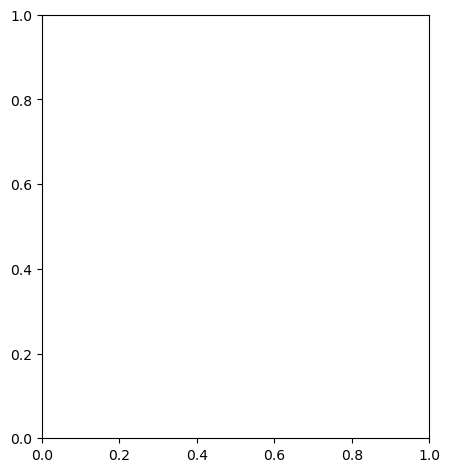

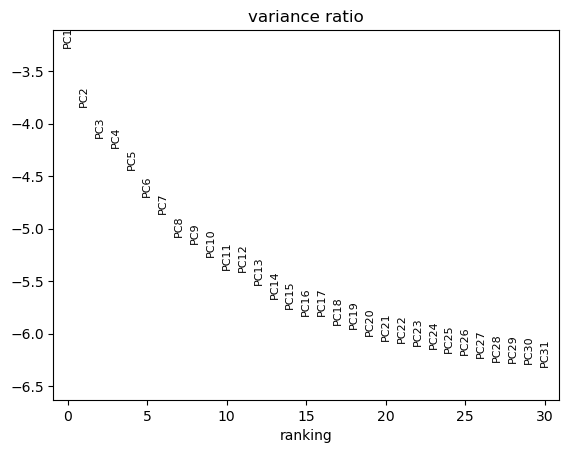

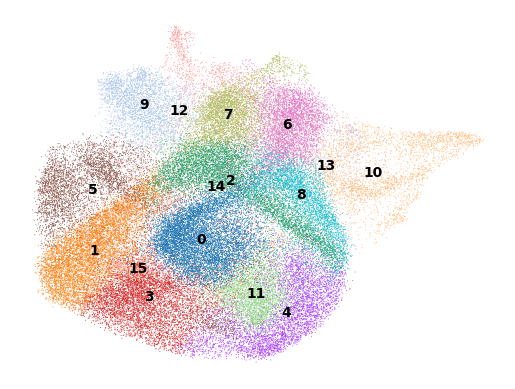

AnnData object with n_obs × n_vars = 64527 × 912
    obs: 'perturbation', 'read count', 'UMI count', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'ensembl_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [3]:
figs_cluster = cr.ax.clustering.cluster(adata, plot=True, method_cluster="leiden")
adata

## Mixscape

In [6]:
", ".join(adata.obs.perturbation.astype(str).unique())

'63(mod)_pBA580, OST4_pDS353, SEC61A1_pDS031, EIF2B4_pDS491, SRPR_pDS482, IER3IP1_pDS002, YIPF5_pDS186, HARS_pDS466, SLMO2_pDS433, DAD1_pDS499, TIMM23_pDS284, DARS_pDS495, IER3IP1_pDS110, AMIGO3_pDS434, ASCC3_pDS052, IDH3A_pDS393, DNAJC19_pDS026, UFM1_pDS040, IARS2_pDS090, QARS_pDS510, SOCS1_pDS479, UFL1_pDS410, DDRGK1_pDS041, Gal4-4(mod)_pBA582, STT3A_pDS011, SAMM50_pDS156, SEC61B_pDS162, ARHGAP22_pDS458, SPCS2_pDS401, MRGBP_pDS124, SEC61B_pDS033, SEL1L_pDS373, GMPPB_pDS391, P4HB_pDS397, PDIA6_pDS029, KCTD16_pDS096, ATP5B_pDS055, CCND3_pDS006, EIF2AK3_pBA572, CARS_pDS460, PSMD4_pDS488, SEC61A1_pDS032, HSPA9_pDS088, HYOU1_pDS089, MTHFD1_pDS395, CAD_pDS468, TMEM167A_pDS038, GNPNAT1_pDS506, TTI2_pDS408, SLC39A7_pDS219, DERL2_pDS042, NEDD8_pDS396, TARS_pDS405, TELO2_pDS496, SEC63_pDS218, GBF1_pDS043, MRPL39_pDS498, FARSB_pDS390, MANF_pDS027, MARS_pDS394, HSD17B12_pDS087, SYVN1_pDS442, IARS2_pDS091, ASCC3_pDS051, FECH_pDS494, EIF2B2_pDS463, SARS_pDS467, TTI1_pDS407, XRN1_pDS411, HSPA5_pDS0

In [7]:
figs_mix = cr.ax.perform_mixscape(adata, "perturbation", key_control="NT", perturbation_type="KO", split_by=None, 
                                  labels_target_genes="gene_target", assay=None, layer="X_pert", min_de_genes=5, 
                                  plot=True)

OverflowError: cannot convert float infinity to integer

## Augur

In [24]:
import pertpy as pt
classifier = "random_forest_classifier"
ag_rfc = pt.tl.Augur(classifier)
loaded_data = ag_rfc.load(adata)  # add dummy variables, rename cell type & label columns

KeyError: 'label'

In [17]:
# data, results, figs = cr.ax.perform_augur(adata, classifier="random_forest_classifier", augur_mode="default", subsample_size=20, n_threads=4, 
#                                           label_col="perturbation", label_cell_type="celltype", label_condition="OST4_pDS353", label_treatment="SEC61A1_pDS031")
data, results, figs = cr.ax.perform_augur(adata, classifier="random_forest_classifier", n_threads=4)

KeyError: 'label'

# Analysis

## Guide RNA Assignment

In [ ]:
figs_guide_rna = ca.assign_guide_rna(adata)
adata

sc.pl.violin(eval_adata, keys="ISG15", groupby="condition")